In [22]:
import matplotlib.pyplot as plt
import numpy as np

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

seed = 1234
np.random.seed(seed)

In [2]:
# Load the dataset and perform train-test-validation split
dataset = load_dataset("imdb").shuffle(seed=seed)
vectorizer = TfidfVectorizer().fit(dataset["train"]["text"])

train_texts = vectorizer.transform(dataset["train"]["text"])
train_labels = np.array(dataset["train"]["label"])

test_texts = vectorizer.transform(dataset["test"]["text"])
test_labels = np.array(dataset["test"]["label"])

train_X, valid_X, train_y, valid_y = train_test_split(
    train_texts,
    train_labels,
    test_size=0.25,
    random_state=seed,
    stratify=train_labels
)

In [ ]:
# Calculate classifier error for different k-values
def calculate_errors(k_vals) -> tuple[list, list]:
    train_error = []
    validation_error = []

    for k in k_vals:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(train_X, train_y)
        train_error.append(1 - knn.score(train_X, train_y))
        validation_error.append(1 - knn.score(valid_X, valid_y))
    
    return train_error, validation_error


k_vals = range(1, 71, 2)
train_error, valid_error = calculate_errors(k_vals)

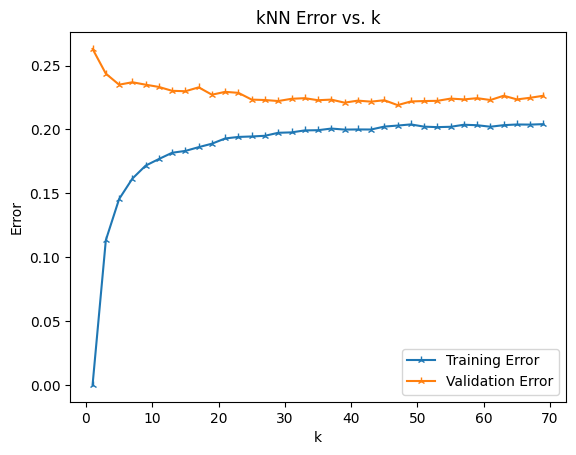

In [ ]:
def plot_errors(k_vals, train_error, valid_error) -> None: 
    plt.plot(k_vals, train_error, label="Training Error", marker='2')
    plt.plot(k_vals, valid_error, label="Validation Error", marker='2')
    plt.xlabel("k")
    plt.ylabel("Error")
    plt.title("kNN Error vs. k")
    plt.legend(loc='lower right')

plot_errors(k_vals, train_error, valid_error)

In [ ]:
# Get the k value with the lowest validation error
best_k_ind = sorted(enumerate(valid_error), key=lambda x: x[1])[0][0]
best_k = k_vals[best_k_ind]

# Create a classifier and get its predictions + accuracy on the test set
clf = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
clf.fit(train_X, train_y)
test_acc = clf.score(test_texts, test_labels)
test_predictions = clf.predict(test_texts)
print(f'Test Accuracy of best kNN classifier: {(test_acc * 100):.2f}%')

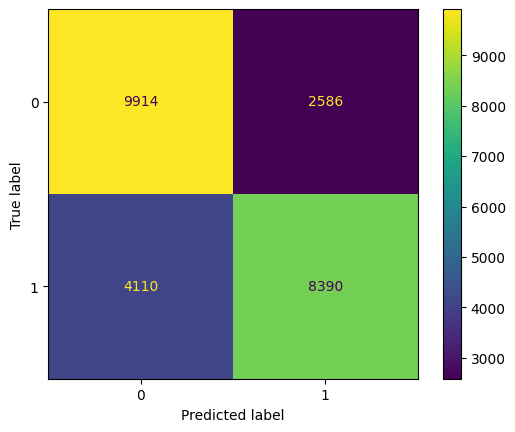

In [26]:
# Confusion matrix for kNN classifier with best_k
cf_display = ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions);